In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.ticker import MultipleLocator

-**Dimensionality and Complexity**

In [2]:
metrics = ["Saliency", "NSS", "NSS_Saliency", "NSS_CNN", "NSS_CNN_Saliency", "NSS_VSFACNN", "NSS_VSFACNN_Saliency", "CNN", "CNN_Saliency", "VSFACNN", "VSFACNN_Saliency"]
srcc = [0.2048, 0.7103, 0.7038, 0.7546, 0.7541, 0.7338, 0.7333, 0.6438, 0.6274, 0.7918, 0.6441]
dim = [224, 1836, 2060, 3884, 4108, 5932, 5932, 2048, 2272, 4096, 4096]

In [3]:
df1= pd.read_csv(f'./runtime_comparison/feature_extraction_bc4_runtimes.csv')
extraction_time = df1['Feature Extractor'].tolist()
df1

,METRICS,Feature Extractor
0,Saliency,52.621347
1,NSS,103.312130
2,NSS_Saliency,289.216961
3,NSS_CNN,115.361240
4,NSS_CNN_Saliency,310.812224
5,NSS_VSFACNN,1944.478991
6,NSS_VSFACNN_Saliency,196.726939
7,CNN,23.739883
8,CNN_Saliency,66.989293
9,VSFACNN,1841.127690


In [4]:
df2= pd.read_csv(f'./runtime_comparison/quality_predictor_bc4_runtimes.csv')
prediction_time = df2['Quality Predictor'].tolist()
# df2

In [5]:
data = {
     'METRICS': metrics,
     'SRCC (on YouTube-UGC)': srcc,
     'DIM': dim,
     'Feature Extractor': extraction_time,
     'Quality Predictor': prediction_time
}
df = pd.DataFrame(data)
df.to_csv(f'./runtime_comparison/runtime_comparison_bc4.csv', index=False)
df

,METRICS,SRCC (on YouTube-UGC),DIM,Feature Extractor,Quality Predictor
0,Saliency,0.2048,224,52.621347,4.979652
1,NSS,0.7103,1836,103.312130,15.676357
2,NSS_Saliency,0.7038,2060,289.216961,17.064781
3,NSS_CNN,0.7546,3884,115.361240,29.556556
4,NSS_CNN_Saliency,0.7541,4108,310.812224,31.275543
5,NSS_VSFACNN,0.7338,5932,1944.478991,43.941810
6,NSS_VSFACNN_Saliency,0.7333,5932,196.726939,44.125352
7,CNN,0.6438,2048,23.739883,17.453567
8,CNN_Saliency,0.6274,2272,66.989293,18.610317
9,VSFACNN,0.7918,4096,1841.127690,31.692277


-**dim vs. runtime**

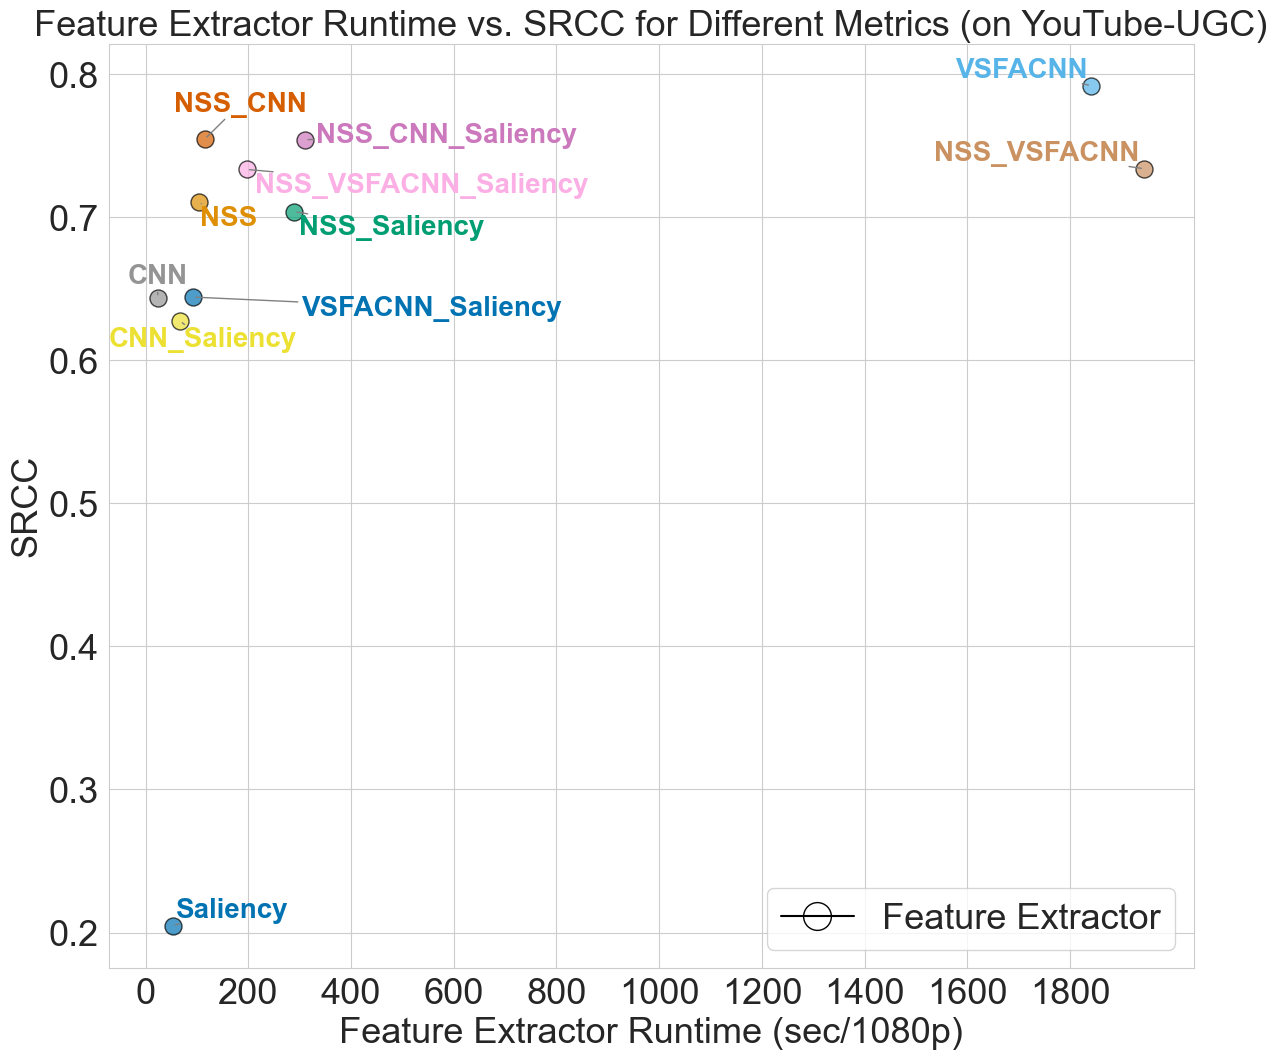

In [6]:
# Create a custom color palette for the metrics
metrics_colors = sns.color_palette('colorblind', n_colors=len(df))

# Set the font size to 18
plt.rc('font', size=26)
plt.rc('axes', titlesize=26)

# Seaborn scatter plot
plt.figure(figsize=(14, 12))

# Plot points for Feature Extractor
for i in range(len(df)):
    plt.scatter(df['Feature Extractor'][i], df['SRCC (on YouTube-UGC)'][i], color=metrics_colors[i], edgecolors='k', linewidth=1, marker='o', s=150, alpha=0.7, label='Feature Extractor')

# Write the name of the metrics next to the data point and set the font size to 10, use plt.annotate to adjust it
texts = []
for i in range(len(df)):
    texts.append(plt.text(df['Feature Extractor'][i], df['SRCC (on YouTube-UGC)'][i], df['METRICS'][i], fontsize=20, ha='right', va='bottom', color=metrics_colors[i], weight='bold'))

# Use the adjust_text library to automatically reposition text to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Create custom legend element for hollow circle
circle_legend = plt.Line2D([0], [0], marker='o', color='k', markerfacecolor='none', markersize=20, markeredgewidth=1, label='Feature Extractor')

# Adjust legend position to 'lower right' and increase the font size
plt.legend(handles=[circle_legend], loc='lower right', fontsize=26)

plt.xticks(range(0, 2000, 200))
plt.xlabel('Feature Extractor Runtime (sec/1080p)', fontsize=26)
plt.ylabel('SRCC', fontsize=26)
plt.title('Feature Extractor Runtime vs. SRCC for Different Metrics (on YouTube-UGC)', fontsize=26)

plt.grid(True)

# Save the plot as EPS format
plt.savefig('./fig/runtime/feature_extractor_runtime.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

-**srcc vs. runtime**

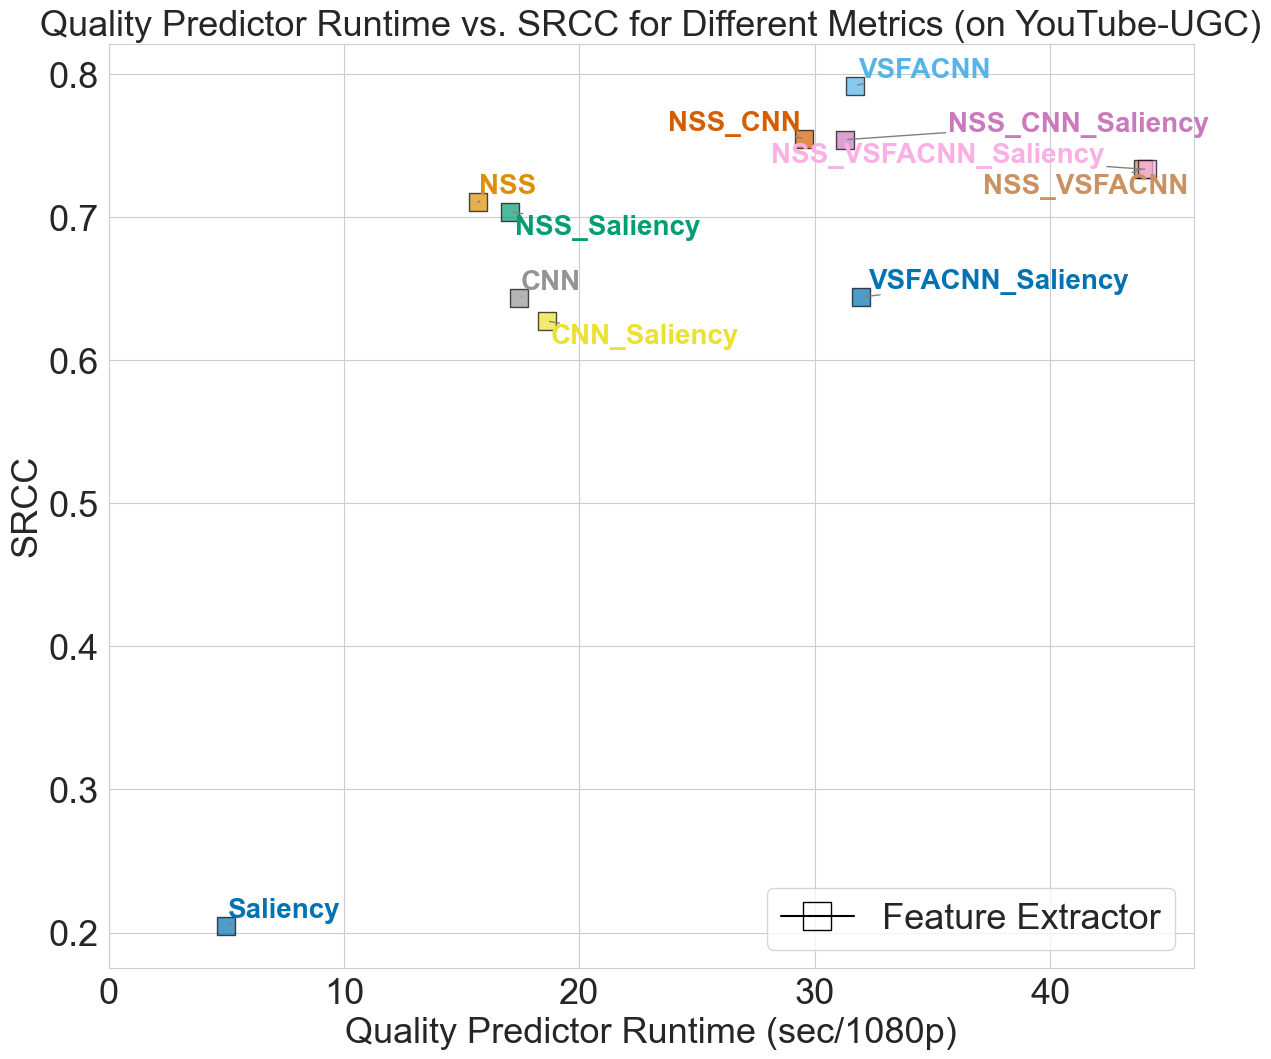

In [7]:
# Create a custom color palette for the metrics
metrics_colors = sns.color_palette('colorblind', n_colors=len(df))

# Set the font size to 18
plt.rc('font', size=26)
plt.rc('axes', titlesize=26)

# Seaborn scatter plot
plt.figure(figsize=(14, 12))

# Plot points for Feature Extractor
for i in range(len(df)):
    plt.scatter(df['Quality Predictor'][i], df['SRCC (on YouTube-UGC)'][i], color=metrics_colors[i], edgecolors='k', linewidth=1, marker='s', s=150, alpha=0.7, label='Quality Predictor')

# Write the name of the metrics next to the data point and set the font size to 10, use plt.annotate to adjust it
texts = []
for i in range(len(df)):
    texts.append(plt.text(df['Quality Predictor'][i], df['SRCC (on YouTube-UGC)'][i], df['METRICS'][i], fontsize=20, ha='right', va='bottom', color=metrics_colors[i], weight='bold'))

# Use the adjust_text library to automatically reposition text to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# Create custom legend element for hollow circle
circle_legend = plt.Line2D([0], [0], marker='s', color='k', markerfacecolor='none', markersize=20, markeredgewidth=1, label='Feature Extractor')

# Adjust legend position to 'lower right' and increase the font size
plt.legend(handles=[circle_legend], loc='lower right', fontsize=26)

plt.xticks(range(0, 50, 10))
plt.xlabel('Quality Predictor Runtime (sec/1080p)', fontsize=26)
plt.ylabel('SRCC', fontsize=26)
plt.title('Quality Predictor Runtime vs. SRCC for Different Metrics (on YouTube-UGC)', fontsize=26)

plt.grid(True)

# Save the plot as EPS format
plt.savefig('./fig/runtime/quality_predictor_runtime.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

** frame vs. similarity**

In [8]:
# Read the data from the Excel file into a DataFrame
df = pd.read_csv('/Users/xxxyy/PycharmProjects/UoB/visulisation/correlation/cosine_similarity.csv')
df

,Sampled Video Frame No.,Cosine similarity
0,1,0.306614
1,2,0.325397
2,3,0.483128
3,4,0.334122
4,5,0.334905
5,6,0.379664
6,7,0.464201
7,8,0.453715
8,9,0.451512
9,10,0.283244


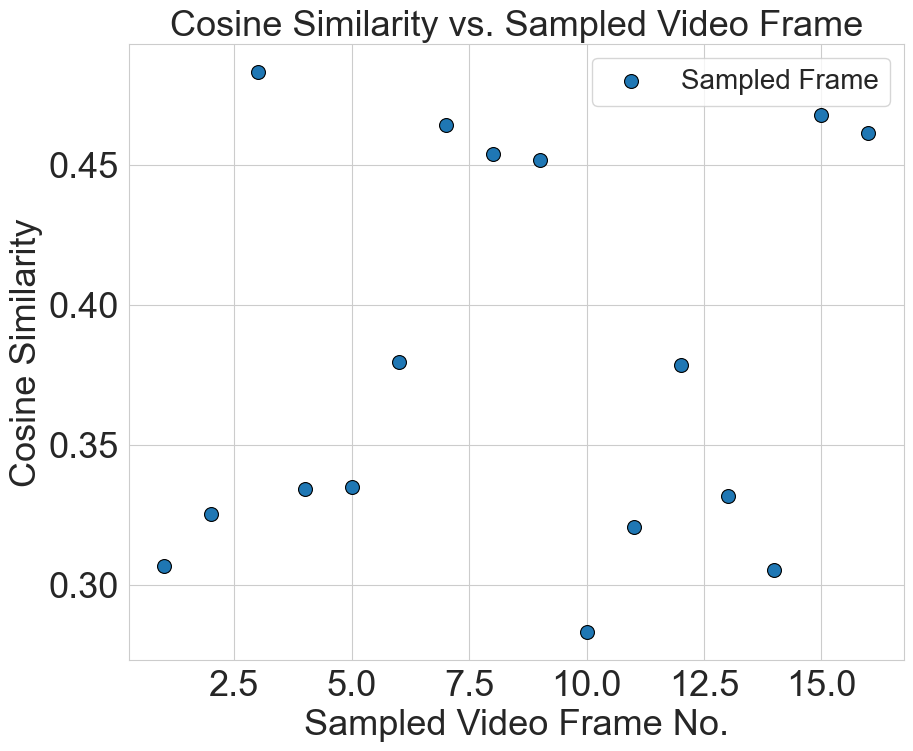

In [9]:
# Set a custom color palette for the plot (useful for better visibility in scientific papers)
colors = ['#1f77b4']

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Sampled Video Frame No.", y="Cosine similarity", data=df, s=100, color=colors[0], edgecolor='black', label='Sampled Frame')
plt.title('Cosine Similarity vs. Sampled Video Frame', fontsize=26)
plt.xlabel('Sampled Video Frame No.', fontsize=26)
plt.ylabel('Cosine Similarity', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.grid(True)

# Add a legend
plt.legend(fontsize=20)

# Save the plot as EPS format
plt.savefig('./fig/runtime/similarity_sampled.png', format='png', dpi=300, bbox_inches='tight')
plt.show()